In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('international_matches.csv')

In [26]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

## Cambiar los Dtype de `date`

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                             datetime64[ns]
home_team                                object
away_team                                object
home_team_continent                      object
away_team_continent                      object
home_team_fifa_rank                       int64
away_team_fifa_rank                       int64
home_team_total_fifa_points               int64
away_team_total_fifa_points               int64
home_team_score                           int64
away_team_score                           int64
tournament                               object
city                                     object
country                                  object
neutral_location                           bool
shoot_out                                object
home_team_result                         object
home_team_goalkeeper_score              float64
away_team_goalkeeper_score              float64
home_team_mean_defense_score            float64
home_team_mean_offense_score            

# Análisis de resultados vs goles

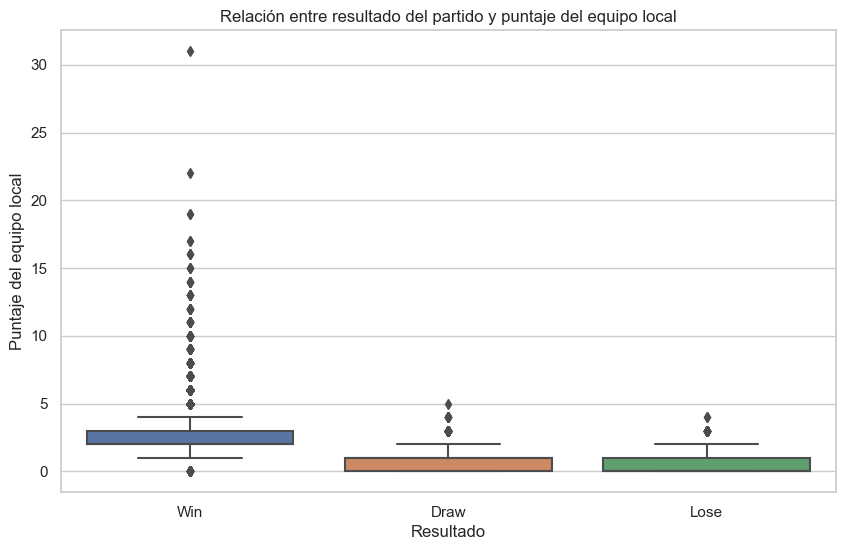

In [31]:
average_goals_per_match = (df['home_team_score'] + df['away_team_score']).mean()

plt.figure(figsize=(10, 6))
sns.boxplot(x='home_team_result', y='home_team_score', data=df)
plt.title('Relación entre resultado del partido y puntaje del equipo local')
plt.xlabel('Resultado')
plt.ylabel('Puntaje del equipo local')
plt.show()

Vemos que los equipos que juegan de local cuando ganan es por que se realizaron entre 1 a 4 goles por partido, a veces los goles que mete el equipo local son mayores pero son casos muy raros.

Mientras que cuando empatan o pierden es por goles entre 2 a 0, puede haber algunos partidos con una mayor cantidad de goles pero son muy raros

# Partidos con penalizaciones

In [36]:
penalty_matches = df[df['shoot_out'] == 'Yes']
penalty_frequency = len(penalty_matches) / len(df) * 100
print("La probabilidad deque haya un penal es:" ,penalty_frequency)

La probabilidad deque haya un penal es: 1.3879018435684127


# Correlaciones

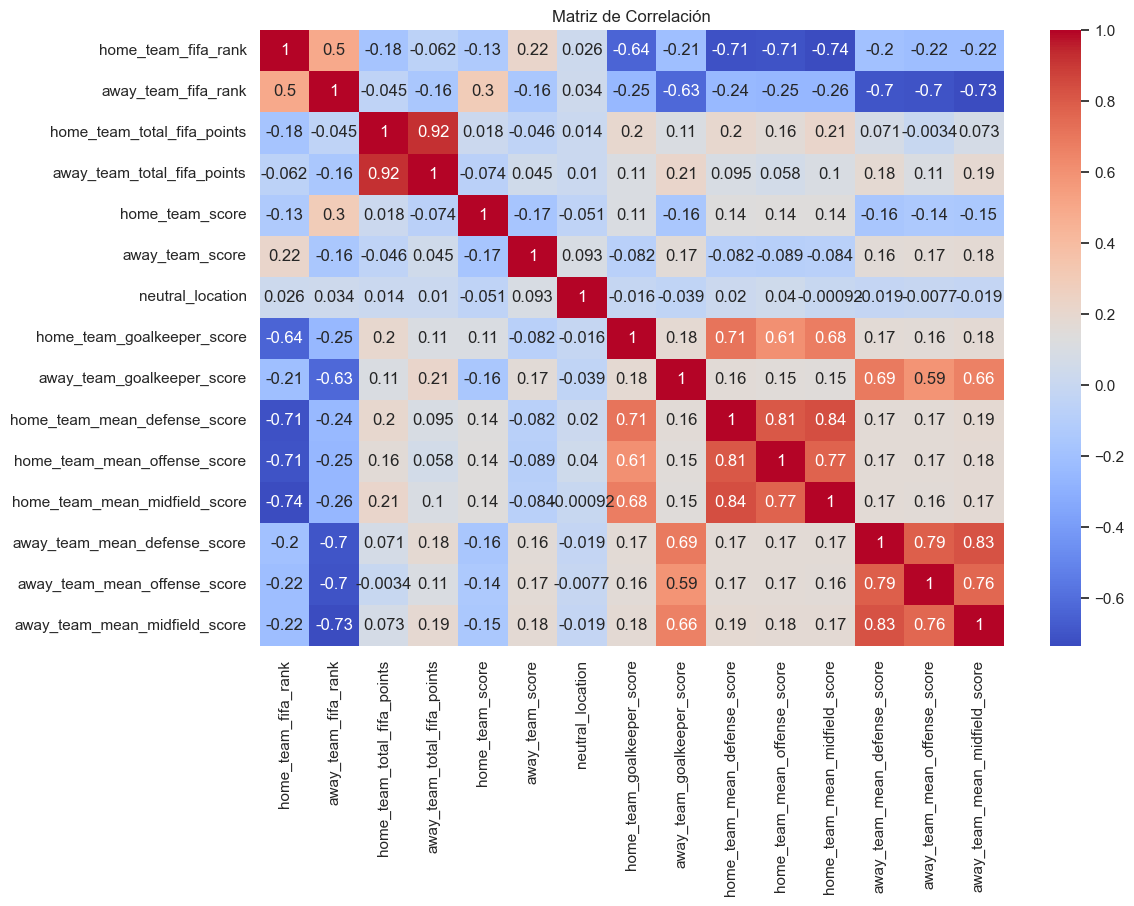

In [34]:
# Matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

En la matri de correlaciones podemos observar lo siguiente:
- Hay una relación del 92% entre los puntos totales de la FIFA según los puntajes del equipo Local y el Visitante, o sea el que tiene mayor puntaje sobre el otro es mas probable que gane el partido.
- Jugar de Visitante o Local es lo mismo, hay una probailidad del 50% de ganar el partido.
- El puntaje del arquero local tiene que ver mucho con el puntaje de su defensa en un 71%, medio campo en 61% y ofensiva en el 68%. Estos valores no son los mismos para el equipo visitante, puede ser que por la presion de ser visitante el porcentaje se vea disminuido en 69% para la defensa, 59% para el medio campo y 66% para la ofensiva.
- Los valores relacionados ente la defensa, el medio campo y la ofensiva, se encuentran intimamente relacionadas tanto para los equipos locales como para los visitantes, pero este valor es menor siempre para el equipo visitante, no por mucho pero se nota un poco.

# Lista de Paises

In [6]:
unique_countries = df['country'].unique()
unique_countries_sorted = sorted(unique_countries)

unique_countries_sorted

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China PR',
 'Chinese Taipei',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo DR',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',


# Cantidad de partidos jugados por equipo

In [28]:
matches_played_by_home_team = df['home_team'].value_counts()
matches_played_by_away_team = df['away_team'].value_counts()
matches_played_by_away_team

Zambia                      243
Costa Rica                  217
Paraguay                    216
Sweden                      206
Mexico                      201
                           ... 
Bahamas                      20
Turks and Caicos Islands     18
Montserrat                   18
American Samoa               14
Samoa                        14
Name: away_team, Length: 211, dtype: int64

# Continente con mas partidos ganados

In [7]:
# Filtrar los partidos que terminaron en victoria para el equipo local
winning_matches = df[df['home_team_result'] == 'Win']

# Contar las victorias por continente para los equipos locales
home_wins_by_continent = winning_matches['home_team_continent'].value_counts()

# Encontrar el continente con más victorias
continent_with_most_wins = home_wins_by_continent.idxmax()
total_wins = home_wins_by_continent.max()

print("El continente que ha ganado más partidos de fútbol es:", continent_with_most_wins)
print("Total de victorias:", total_wins)

El continente que ha ganado más partidos de fútbol es: Europe
Total de victorias: 3517


# Lista de continentes con más partidos ganados

In [8]:
# Contar las victorias por continente para los equipos locales
home_wins_by_continent = winning_matches['home_team_continent'].value_counts()

# Ordenar la lista de mayor a menor
sorted_continents = home_wins_by_continent.sort_values(ascending=False)

print("Lista de continentes con más partidos ganados:")
for continent, wins in sorted_continents.items():
    print(f"Continente: {continent}, Partidos ganados: {wins}")

Lista de continentes con más partidos ganados:
Continente: Europe, Partidos ganados: 3517
Continente: Africa, Partidos ganados: 2942
Continente: Asia, Partidos ganados: 2585
Continente: North America, Partidos ganados: 1369
Continente: South America, Partidos ganados: 1062
Continente: Oceania, Partidos ganados: 286


# Distribución de partidos jugados por continente

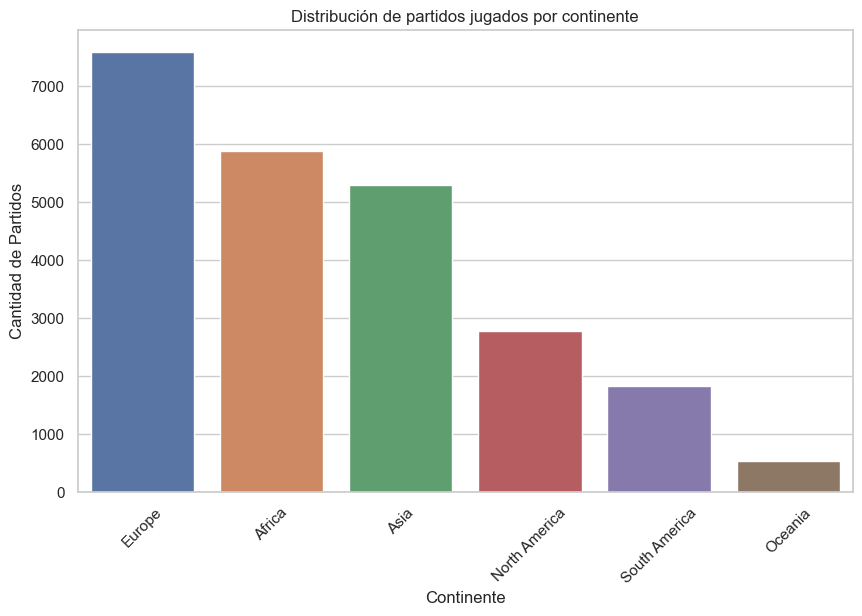

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_team_continent', data=df, order=df['home_team_continent'].value_counts().index)
plt.title('Distribución de partidos jugados por continente')
plt.xlabel('Continente')
plt.ylabel('Cantidad de Partidos')
plt.xticks(rotation=45)
plt.show()

# Top 5 de cada Continente

In [9]:
# Crear un diccionario para almacenar los equipos y sus victorias por continente
teams_by_continent = {}

# Iterar a través de los partidos ganados y agregar los equipos a la lista correspondiente en el diccionario
for index, row in winning_matches.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_team_continent = row['home_team_continent']
    away_team_continent = row['away_team_continent']
    
    if home_team_continent not in teams_by_continent:
        teams_by_continent[home_team_continent] = {}
    if away_team_continent not in teams_by_continent:
        teams_by_continent[away_team_continent] = {}
    
    teams_by_continent[home_team_continent][home_team] = teams_by_continent[home_team_continent].get(home_team, 0) + 1
    teams_by_continent[away_team_continent][away_team] = teams_by_continent[away_team_continent].get(away_team, 0) + 1

# Imprimir el top 5 de equipos por continente
for continent, teams in teams_by_continent.items():
    print(f"Top 5 de equipos en {continent}:")
    sorted_teams = sorted(teams.items(), key=lambda x: x[1], reverse=True)[:5]
    for team, wins in sorted_teams:
        print(f"Equipo: {team}, Partidos ganados: {wins}")
    print("\n")

Top 5 de equipos en South America:
Equipo: Brazil, Partidos ganados: 216
Equipo: Trinidad and Tobago, Partidos ganados: 207
Equipo: Chile, Partidos ganados: 190
Equipo: Ecuador, Partidos ganados: 181
Equipo: Argentina, Partidos ganados: 178


Top 5 de equipos en Africa:
Equipo: Egypt, Partidos ganados: 223
Equipo: South Africa, Partidos ganados: 197
Equipo: Zambia, Partidos ganados: 186
Equipo: Tunisia, Partidos ganados: 181
Equipo: Ghana, Partidos ganados: 179


Top 5 de equipos en Oceania:
Equipo: Australia, Partidos ganados: 163
Equipo: New Zealand, Partidos ganados: 104
Equipo: Fiji, Partidos ganados: 56
Equipo: Solomon Islands, Partidos ganados: 56
Equipo: Tahiti, Partidos ganados: 52


Top 5 de equipos en North America:
Equipo: Mexico, Partidos ganados: 269
Equipo: USA, Partidos ganados: 261
Equipo: Costa Rica, Partidos ganados: 209
Equipo: Jamaica, Partidos ganados: 189
Equipo: Honduras, Partidos ganados: 174


Top 5 de equipos en Europe:
Equipo: Estonia, Partidos ganados: 174
E

In [10]:
#Filtrar solo los partidos donde el país fue el equipo local
local_matches = df[df['home_team'] == df['country']]

# Calcular la tasa de victoria para los partidos locales por país
local_win_rates = local_matches.groupby('country')['home_team_result'].apply(lambda x: (x == 'Win').mean())

# Imprimir los resultados
# Imprimir la lista completa sin resumir
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("Tasa de victoria para partidos locales por país:")
    print(local_win_rates)

Tasa de victoria para partidos locales por país:
country
Afghanistan                       0.500000
Albania                           0.405405
Algeria                           0.669725
Andorra                           0.115385
Angola                            0.620000
Anguilla                          0.000000
Antigua and Barbuda               0.482759
Argentina                         0.685714
Armenia                           0.326316
Aruba                             0.388889
Australia                         0.702703
Austria                           0.445161
Azerbaijan                        0.250000
Bahamas                           0.333333
Bahrain                           0.471698
Bangladesh                        0.480000
Barbados                          0.402985
Belarus                           0.375000
Belgium                           0.586957
Belize                            0.416667
Benin                             0.455882
Bermuda                           0.4523

In [11]:
df['tournament'].unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'Lunar New Year Cup',
       'African Cup of Nations', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'UEFA Euro', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup',
       'COSAFA Cup qu

# Filtro de partidos de la copa del Mundo y Clasificatorias

In [12]:
# Filtrar los partidos en torneos de Copa del Mundo
world_cup_matches = df[df['tournament'] == 'FIFA World Cup']

# Filtrar los partidos en clasificación para la Copa del Mundo
qualification_matches = df[df['tournament'].str.contains('FIFA World Cup qualification')]

# Filtrar solo los partidos en los que el resultado es "Win"
def filter_winning_matches(matches):
    return matches[matches['home_team_result'] == 'Win']

winning_world_cup_matches = filter_winning_matches(world_cup_matches)
winning_qualification_matches = filter_winning_matches(qualification_matches)

# Contar cuántos partidos ganó cada país en torneos de Copa del Mundo como local
home_world_cup_wins = winning_world_cup_matches['home_team'].value_counts()

# Contar cuántos partidos ganó cada país en clasificación para la Copa del Mundo como local
home_qualification_wins = winning_qualification_matches['home_team'].value_counts()

# Contar cuántos partidos ganó cada país en torneos de Copa del Mundo como visitante
away_world_cup_wins = winning_world_cup_matches['away_team'].value_counts()

# Contar cuántos partidos ganó cada país en clasificación para la Copa del Mundo como visitante
away_qualification_wins = winning_qualification_matches['away_team'].value_counts()

# Sumar los conteos para obtener el total de partidos ganados por país en torneos de Copa del Mundo
total_world_cup_wins = home_world_cup_wins.add(away_world_cup_wins, fill_value=0)

# Sumar los conteos para obtener el total de partidos ganados por país en clasificación para la Copa del Mundo
total_qualification_wins = home_qualification_wins.add(away_qualification_wins, fill_value=0)

# Mostrar los resultados
print("Total de partidos ganados por país en torneos de Copa del Mundo:")
print(total_world_cup_wins)

print("\nTotal de partidos ganados por país en clasificación para la Copa del Mundo:")
print(total_qualification_wins)

Total de partidos ganados por país en torneos de Copa del Mundo:
Algeria       3.0
Argentina    22.0
Australia     7.0
Austria       1.0
Belgium      14.0
             ... 
Tunisia       7.0
Turkey        3.0
USA           8.0
Ukraine       3.0
Uruguay       6.0
Length: 61, dtype: float64

Total de partidos ganados por país en clasificación para la Copa del Mundo:
Afghanistan       10.0
Albania           36.0
Algeria           33.0
American Samoa     4.0
Andorra           32.0
                  ... 
Vietnam           25.0
Wales             29.0
Yemen             20.0
Zambia            33.0
Zimbabwe          28.0
Length: 211, dtype: float64


## Taza de victoria por continente

In [13]:
# Filtrar los partidos en torneos de Copa del Mundo y clasificación
world_cup_matches = df[df['tournament'] == 'FIFA World Cup']
qualification_matches = df[df['tournament'].str.contains('FIFA World Cup qualification')]

# Filtrar solo los partidos en los que el resultado es "Win"
def filter_winning_matches(matches):
    return matches[matches['home_team_result'] == 'Win']

winning_world_cup_matches = filter_winning_matches(world_cup_matches)
winning_qualification_matches = filter_winning_matches(qualification_matches)

# Contar el total de partidos jugados por cada país en torneos de Copa del Mundo
total_world_cup_matches_per_country = world_cup_matches['home_team'].append(winning_world_cup_matches['away_team']).value_counts()

# Contar el total de partidos jugados por cada país en clasificación para la Copa del Mundo
total_qualification_matches_per_country = qualification_matches['home_team'].append(winning_qualification_matches['away_team']).value_counts()

# Calcular la tasa de victoria para torneos de Copa del Mundo y clasificación
world_cup_win_rate = winning_world_cup_matches['home_team'].append(winning_world_cup_matches['away_team']).value_counts() / total_world_cup_matches_per_country
qualification_win_rate = winning_qualification_matches['home_team'].append(winning_qualification_matches['away_team']).value_counts() / total_qualification_matches_per_country

# Mostrar los resultados
print("Tasa de victoria en Copas del Mundo:")
print(world_cup_win_rate)

print("\nTasa de victoria en clasificación para la Copa del Mundo:")
print(qualification_win_rate)

Tasa de victoria en Copas del Mundo:
Algeria      0.600000
Angola            NaN
Argentina    0.814815
Australia    0.700000
Austria      1.000000
               ...   
Tunisia      0.700000
Turkey       1.000000
USA          0.500000
Ukraine      1.000000
Uruguay      0.500000
Length: 65, dtype: float64

Tasa de victoria en clasificación para la Copa del Mundo:
Afghanistan       0.555556
Albania           0.600000
Algeria           0.733333
American Samoa    0.500000
Andorra           0.533333
                    ...   
Vietnam           0.641026
Wales             0.557692
Yemen             0.588235
Zambia            0.733333
Zimbabwe          0.666667
Length: 211, dtype: float64


C:\Users\Juan Papi\AppData\Local\Temp\ipykernel_18120\2557820224.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_world_cup_matches_per_country = world_cup_matches['home_team'].append(winning_world_cup_matches['away_team']).value_counts()
C:\Users\Juan Papi\AppData\Local\Temp\ipykernel_18120\2557820224.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_qualification_matches_per_country = qualification_matches['home_team'].append(winning_qualification_matches['away_team']).value_counts()
C:\Users\Juan Papi\AppData\Local\Temp\ipykernel_18120\2557820224.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world_cup_win_rate = winning_world_cup_matches['home_team'].append(winning_world_cup_matches['away_tea

# Los 5 mejores de cada continente en tasas de victoria para torneos de Copa del Mundo

In [14]:
# Agregar la columna 'continent' al DataFrame de acuerdo a los datos existentes
world_cup_win_rate_df = world_cup_win_rate.reset_index()
world_cup_win_rate_df.columns = ['country', 'world_cup_win_rate']
world_cup_win_rate_df['continent'] = world_cup_win_rate_df['country'].map(df.drop_duplicates('country').set_index('country')['home_team_continent'])

# Obtener el top 5 de países por continente que más partidos ganaron en torneos de Copa del Mundo
top_5_world_cup_by_continent = (
    world_cup_win_rate_df.groupby('continent')
    .apply(lambda group: group.nlargest(5, 'world_cup_win_rate'))
    .reset_index(drop=True)
)

# Calcular la cantidad de partidos ganados y jugados por cada país en clasificación
qualification_win_counts = winning_qualification_matches['home_team'].append(winning_qualification_matches['away_team']).value_counts()
qualification_total_matches = qualification_matches['home_team'].append(winning_qualification_matches['away_team']).value_counts()

# Agregar la columna 'continent' al DataFrame de acuerdo a los datos existentes
qualification_win_rate_df = qualification_win_rate.reset_index()
qualification_win_rate_df.columns = ['country', 'qualification_win_rate']
qualification_win_rate_df['continent'] = qualification_win_rate_df['country'].map(df.drop_duplicates('country').set_index('country')['home_team_continent'])

# Obtener el top 5 de países por continente que más partidos ganaron en clasificación
top_5_qualification_by_continent = (
    qualification_win_rate_df.groupby('continent')
    .apply(lambda group: group.nlargest(5, 'qualification_win_rate'))
    .reset_index(drop=True)
)

# Mostrar los mejores países por continente en tasas de victoria para torneos de Copa del Mundo
print("Los 5 mejores de cada continente en tasas de victoria para torneos de Copa del Mundo:")
print(top_5_world_cup_by_continent[['country', 'continent', 'world_cup_win_rate']])

# Mostrar los mejores países por continente en tasas de victoria para clasificación
print("\nLos 5 mejores de cada continente en tasas de victoria para clasificación:")
print(top_5_qualification_by_continent[['country', 'continent', 'qualification_win_rate']])

Los 5 mejores de cada continente en tasas de victoria para torneos de Copa del Mundo:
                   country      continent  world_cup_win_rate
0            Côte d'Ivoire         Africa            0.875000
1                  Tunisia         Africa            0.700000
2                    Egypt         Africa            0.666667
3                    Ghana         Africa            0.625000
4                  Nigeria         Africa            0.611111
5                 China PR           Asia            0.666667
6                Korea DPR           Asia            0.666667
7           Korea Republic           Asia            0.619048
8             Saudi Arabia           Asia            0.615385
9                  IR Iran           Asia            0.555556
10                 Austria         Europe            1.000000
11  Bosnia and Herzegovina         Europe            1.000000
12                  Norway         Europe            1.000000
13                  Turkey         Europe     

C:\Users\Juan Papi\AppData\Local\Temp\ipykernel_18120\4045894751.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qualification_win_counts = winning_qualification_matches['home_team'].append(winning_qualification_matches['away_team']).value_counts()
C:\Users\Juan Papi\AppData\Local\Temp\ipykernel_18120\4045894751.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  qualification_total_matches = qualification_matches['home_team'].append(winning_qualification_matches['away_team']).value_counts()


# Tasa de victoria en Copa del Mundo

In [15]:
# Calcular la cantidad de partidos ganados y jugados por cada país en torneos de Copa del Mundo
world_cup_win_counts = winning_world_cup_matches['home_team'].append(winning_world_cup_matches['away_team']).value_counts()
world_cup_total_matches = world_cup_matches['home_team'].append(winning_world_cup_matches['away_team']).value_counts()

# Calcular la tasa de victoria en torneos de Copa del Mundo para cada país
world_cup_win_rate = world_cup_win_counts / world_cup_total_matches

# Agregar la columna 'continent' al DataFrame de acuerdo a los datos existentes
win_rate_df = pd.DataFrame({'country': world_cup_win_rate.index, 'world_cup_win_rate': world_cup_win_rate.values})
win_rate_df['continent'] = win_rate_df['country'].map(df.drop_duplicates('country').set_index('country')['home_team_continent'])

# Obtener el top 5 de países por continente que más partidos ganaron en torneos de Copa del Mundo
top_5_by_continent = (
    win_rate_df.groupby('continent')
    .apply(lambda group: group.nlargest(5, 'world_cup_win_rate'))
    .reset_index(drop=True)
)

# Imprimir el top 5 de países por continente, su tasa de victoria en torneos de Copa del Mundo y estadísticas de partidos jugados y ganados
for continent, group in top_5_by_continent.groupby('continent'):
    print(f"Continente: {continent}")
    for index, row in group.iterrows():
        country = row['country']
        win_rate = row['world_cup_win_rate']
        total = world_cup_total_matches.get(country, 0)
        wins = world_cup_win_counts.get(country, 0)
        print(f"{country}: Tasa de victoria en Copa del Mundo = {win_rate:.4f}, Partidos jugados = {total}, Partidos ganados = {wins}")
    print("="*40)

C:\Users\Juan Papi\AppData\Local\Temp\ipykernel_18120\1241082123.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world_cup_win_counts = winning_world_cup_matches['home_team'].append(winning_world_cup_matches['away_team']).value_counts()
C:\Users\Juan Papi\AppData\Local\Temp\ipykernel_18120\1241082123.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world_cup_total_matches = world_cup_matches['home_team'].append(winning_world_cup_matches['away_team']).value_counts()


Continente: Africa
Côte d'Ivoire: Tasa de victoria en Copa del Mundo = 0.8750, Partidos jugados = 8, Partidos ganados = 7
Tunisia: Tasa de victoria en Copa del Mundo = 0.7000, Partidos jugados = 10, Partidos ganados = 7
Egypt: Tasa de victoria en Copa del Mundo = 0.6667, Partidos jugados = 3, Partidos ganados = 2
Ghana: Tasa de victoria en Copa del Mundo = 0.6250, Partidos jugados = 8, Partidos ganados = 5
Nigeria: Tasa de victoria en Copa del Mundo = 0.6111, Partidos jugados = 18, Partidos ganados = 11
Continente: Asia
China PR: Tasa de victoria en Copa del Mundo = 0.6667, Partidos jugados = 3, Partidos ganados = 2
Korea DPR: Tasa de victoria en Copa del Mundo = 0.6667, Partidos jugados = 3, Partidos ganados = 2
Korea Republic: Tasa de victoria en Copa del Mundo = 0.6190, Partidos jugados = 21, Partidos ganados = 13
Saudi Arabia: Tasa de victoria en Copa del Mundo = 0.6154, Partidos jugados = 13, Partidos ganados = 8
IR Iran: Tasa de victoria en Copa del Mundo = 0.5556, Partidos jugad

# Tasa de victoria en Clasificatorias

In [16]:
# Calcular la tasa de victoria en clasificación para la Copa del Mundo para cada país
qualification_win_rate = qualification_win_counts / qualification_total_matches

# Agregar la columna 'continent' al DataFrame de acuerdo a los datos existentes
win_rate_df = pd.DataFrame({'country': qualification_win_rate.index, 'qualification_win_rate': qualification_win_rate.values})
win_rate_df['continent'] = win_rate_df['country'].map(df.drop_duplicates('country').set_index('country')['home_team_continent'])

# Obtener el top 5 de países por continente que más partidos ganaron en clasificación para la Copa del Mundo
top_5_by_continent = (
    win_rate_df.groupby('continent')
    .apply(lambda group: group.nlargest(5, 'qualification_win_rate'))
    .reset_index(drop=True)
)

# Imprimir el top 5 de países por continente, su tasa de victoria en clasificación para la Copa del Mundo y estadísticas de partidos jugados y ganados
for continent, group in top_5_by_continent.groupby('continent'):
    print(f"Continente: {continent}")
    for index, row in group.iterrows():
        country = row['country']
        win_rate = row['qualification_win_rate']
        total = qualification_total_matches.get(country, 0)
        wins = qualification_win_counts.get(country, 0)
        print(f"{country}: Tasa de victoria en Clasificación para la Copa del Mundo = {win_rate:.4f}, Partidos jugados = {total}, Partidos ganados = {wins}")
    print("="*40)

Continente: Africa
Egypt: Tasa de victoria en Clasificación para la Copa del Mundo = 0.9286, Partidos jugados = 42, Partidos ganados = 39
Cameroon: Tasa de victoria en Clasificación para la Copa del Mundo = 0.8421, Partidos jugados = 38, Partidos ganados = 32
Nigeria: Tasa de victoria en Clasificación para la Copa del Mundo = 0.8333, Partidos jugados = 36, Partidos ganados = 30
Morocco: Tasa de victoria en Clasificación para la Copa del Mundo = 0.8205, Partidos jugados = 39, Partidos ganados = 32
Tunisia: Tasa de victoria en Clasificación para la Copa del Mundo = 0.8000, Partidos jugados = 35, Partidos ganados = 28
Continente: Asia
Chinese Taipei: Tasa de victoria en Clasificación para la Copa del Mundo = 0.8571, Partidos jugados = 21, Partidos ganados = 18
Saudi Arabia: Tasa de victoria en Clasificación para la Copa del Mundo = 0.8358, Partidos jugados = 67, Partidos ganados = 56
Korea Republic: Tasa de victoria en Clasificación para la Copa del Mundo = 0.7925, Partidos jugados = 53, 

# Top 5 de porcentaje de ganar un por Continente en Copa del Mundo

In [17]:
top_5_by_continent

,country,qualification_win_rate,continent
0,Egypt,0.928571,Africa
1,Cameroon,0.842105,Africa
2,Nigeria,0.833333,Africa
3,Morocco,0.820513,Africa
4,Tunisia,0.800000,Africa
5,Chinese Taipei,0.857143,Asia
6,Saudi Arabia,0.835821,Asia
7,Korea Republic,0.792453,Asia
8,Japan,0.763636,Asia
9,IR Iran,0.750000,Asia


## Gráfico Top 5 x Continente en Copas del Mundo

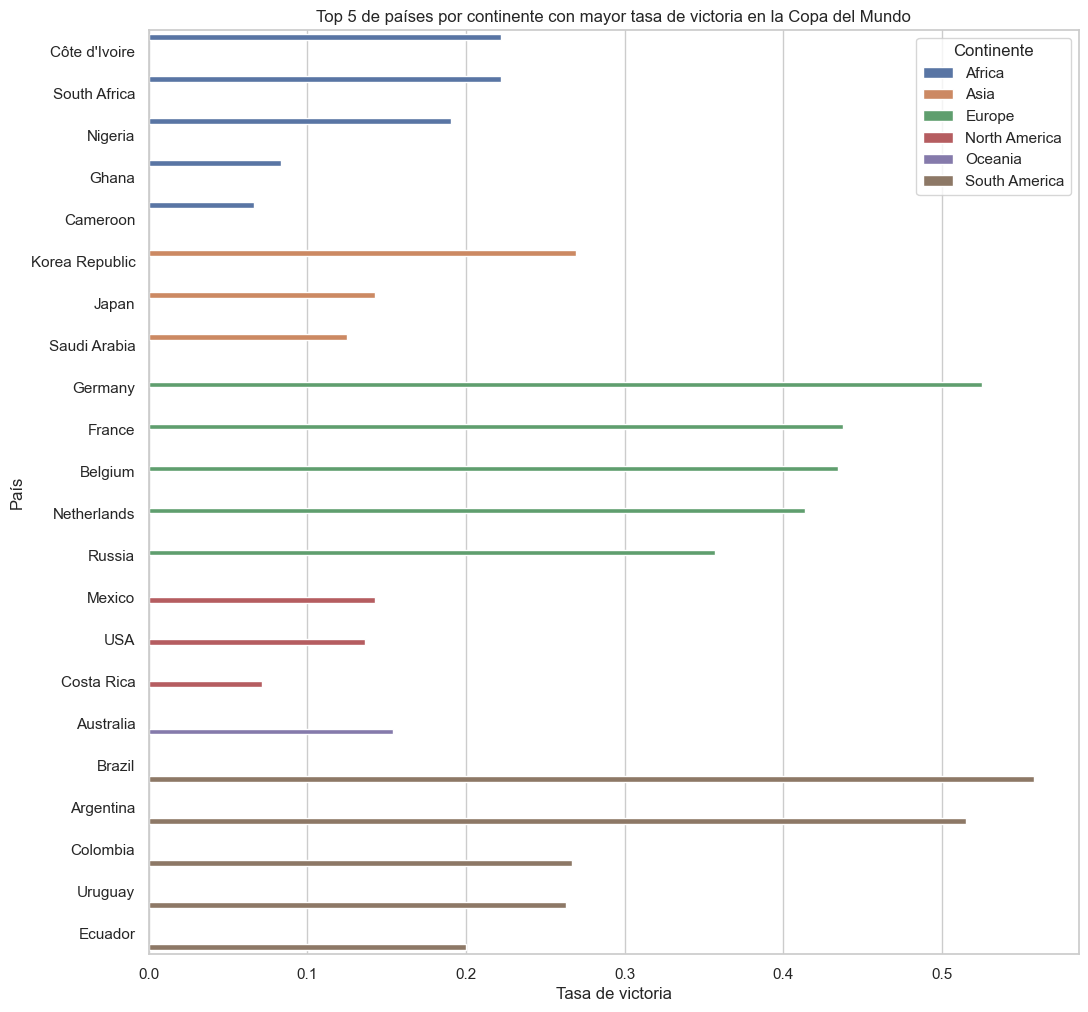

In [18]:
# Calcular la cantidad de partidos jugados, ganados y perdidos por cada país
matches_per_country = pd.concat([world_cup_matches['home_team'], world_cup_matches['away_team']]).value_counts()
win_counts = world_cup_matches[world_cup_matches['home_team_result'] == 'Win']['home_team'].value_counts()
loss_counts_local = world_cup_matches[world_cup_matches['home_team_result'] == 'Loss']['home_team'].value_counts()
loss_counts_visitor = world_cup_matches[world_cup_matches['home_team_result'] == 'Win']['away_team'].value_counts()

# Combinar las cuentas de partidos perdidos de local y visitante
loss_counts = loss_counts_local.add(loss_counts_visitor, fill_value=0)

# Calcular la tasa de victoria en la Copa del Mundo para cada país
win_rate = win_counts / matches_per_country

# Excluir los países con tasa de victoria NaN
win_rate = win_rate.dropna()

# Agregar la columna 'continent' al DataFrame de acuerdo a los datos existentes
win_rate_df = pd.DataFrame({'country': win_rate.index, 'win_rate': win_rate.values})
win_rate_df['continent'] = win_rate_df['country'].map(df.drop_duplicates('country').set_index('country')['home_team_continent'])

# Obtener el top 5 de países por continente que más partidos ganaron
top_5_by_continent = (
    win_rate_df.groupby('continent')
    .apply(lambda group: group.nlargest(5, 'win_rate'))
    .reset_index(drop=True)
)

# Crear un gráfico de barras utilizando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12))
ax = sns.barplot(x='win_rate', y='country', hue='continent', data=top_5_by_continent)

plt.title('Top 5 de países por continente con mayor tasa de victoria en la Copa del Mundo')
plt.xlabel('Tasa de victoria')
plt.ylabel('País')
plt.legend(title='Continente')
plt.show()

# ¿A partir de que año se toma puntajes?

In [19]:
# Filtrar el DataFrame para obtener solo las filas con valores no nulos en las columnas específicas
filtered_df = df.dropna(subset=['home_team_goalkeeper_score', 'away_team_goalkeeper_score',
                                'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score'])

# Ordenar las fechas en orden ascendente
sorted_dates = filtered_df['date'].sort_values()

# Tomar la fecha más antigua
earliest_date = sorted_dates.iloc[0]

print(f"La fecha más antigua con valores no nulos en las columnas 'score' es: {earliest_date}")

La fecha más antigua con valores no nulos en las columnas 'score' es: 2004-09-03 00:00:00


# Ranking por año

In [20]:
# Crear un DataFrame de equipos con sus rankings por año
home_team_rankings = df.groupby(['date', 'home_team'])['home_team_fifa_rank'].min()
away_team_rankings = df.groupby(['date', 'away_team'])['away_team_fifa_rank'].min()

# Concatenar los rankings de equipos como un solo DataFrame
team_rankings = pd.concat([home_team_rankings, away_team_rankings]).reset_index()

# Renombrar las columnas
team_rankings.columns = ['date', 'team', 'fifa_rank']

# Ordenar el DataFrame por fecha y equipo
team_rankings = team_rankings.sort_values(by=['date', 'team'])
team_rankings

,date,team,fifa_rank
23920,1993-08-08,Argentina,5
0,1993-08-08,Bolivia,59
1,1993-08-08,Brazil,8
23921,1993-08-08,Colombia,19
2,1993-08-08,Ecuador,35
...,...,...,...
47834,2022-06-14,USA,15
23918,2022-06-14,Ukraine,27
23919,2022-06-14,Uzbekistan,83
47835,2022-06-14,Wales,18


# ¿Qué pais gano mas torneos de calificacion de la copa del mundo y partidos de la copa del mundo?

In [21]:
# Encontrar el país que ganó más torneos de clasificación y más partidos de la Copa del Mundo
most_qualification_wins = qualification_win_counts.idxmax()
most_world_cup_wins = world_cup_win_counts.idxmax()

# Mostrar los resultados
print(f"País que ganó más torneos de clasificación de la Copa del Mundo: {most_qualification_wins}")
print(f"País que ganó más partidos de la Copa del Mundo: {most_world_cup_wins}")

País que ganó más torneos de clasificación de la Copa del Mundo: Bolivia
País que ganó más partidos de la Copa del Mundo: Brazil


#  ¿Qué pais hizo mas goles en calificacion y en copa del mundo?

In [22]:
# Calcular la cantidad total de goles anotados por cada país en la clasificación
qualification_home_goals = qualification_matches.groupby('home_team')['home_team_score'].sum()
qualification_away_goals = qualification_matches.groupby('away_team')['away_team_score'].sum()
total_qualification_goals = qualification_home_goals.add(qualification_away_goals, fill_value=0)

# Calcular la cantidad total de goles anotados por cada país en la Copa del Mundo
world_cup_home_goals = world_cup_matches.groupby('home_team')['home_team_score'].sum()
world_cup_away_goals = world_cup_matches.groupby('away_team')['away_team_score'].sum()
total_world_cup_goals = world_cup_home_goals.add(world_cup_away_goals, fill_value=0)

# Encontrar el país que anotó más goles en la clasificación y en la Copa del Mundo
most_qualification_goals = total_qualification_goals.idxmax()
most_world_cup_goals = total_world_cup_goals.idxmax()

# Mostrar los resultados
print(f"País que anotó más goles en la clasificación para la Copa del Mundo: {most_qualification_goals}")
print(f"Total de goles anotados en la clasificación: {total_qualification_goals[most_qualification_goals]} goles")
print(f"País que anotó más goles en la Copa del Mundo: {most_world_cup_goals}")
print(f"Total de goles anotados en la Copa del Mundo: {total_world_cup_goals[most_world_cup_goals]} goles")

País que anotó más goles en la clasificación para la Copa del Mundo: Australia
Total de goles anotados en la clasificación: 279 goles
País que anotó más goles en la Copa del Mundo: Brazil
Total de goles anotados en la Copa del Mundo: 81.0 goles


# ¿Cuantos torneos hay en cada continente?

In [23]:
#Contar la cantidad de torneos únicos por continente
unique_tournaments_by_continent = df.groupby('home_team_continent')['tournament'].nunique()

# Mostrar los resultados
print("Cantidad de torneos únicos en cada continente:")
print(unique_tournaments_by_continent)

Cantidad de torneos únicos en cada continente:
home_team_continent
Africa           39
Asia             40
Europe           26
North America    20
Oceania          17
South America    22
Name: tournament, dtype: int64


# ¿En cuantos torneos participo cada pais y cuantos, gano o perdio?

In [24]:
# Agrupar los datos por país y torneo para contar la cantidad de partidos jugados, ganados, empatados y perdidos
grouped = df.groupby(['home_team', 'tournament'])['home_team_result'].value_counts().unstack(fill_value=0)

# Calcular la cantidad de torneos en los que participó cada país
total_tournaments_by_country = grouped.groupby('home_team').size()

# Calcular la cantidad de torneos ganados y perdidos por cada país
total_wins_by_country = grouped['Win'].groupby('home_team').sum()
total_losses_by_country = grouped['Lose'].groupby('home_team').sum()

# Crear el DataFrame final
result_df = pd.DataFrame({
    'País': total_tournaments_by_country.index,
    'Total Torneos': total_tournaments_by_country.values,
    'Torneos Ganados': total_wins_by_country.values,
    'Torneos Perdidos': total_losses_by_country.values
})

# Mostrar los resultados
result_df

,País,Total Torneos,Torneos Ganados,Torneos Perdidos
0,Afghanistan,6,16,12
1,Albania,7,52,49
2,Algeria,8,91,38
3,American Samoa,4,3,13
4,Andorra,5,10,74
...,...,...,...,...
206,Vietnam,8,57,35
207,Wales,6,53,43
208,Yemen,8,27,38
209,Zambia,9,94,35
